# Lab 13: Create a NoSQL Database using PyMongo & MongoDB Queries 


- MongoDB is a schema-free, document-oriented NoSQL database written in C++. 

- A record in MongoDB is a document, which is a data structure composed of field and value pairs. MongoDB documents are encoded in JSON objects (similar to Python dictionnaries), which allows a great flexibility and scaling potential. The values of fields may include other documents, arrays, and arrays of documents.

- What about queries? MongoDB uses a RESTful API. To retrieve certain documents from a db collection, a query document is created containing the fields that the desired documents should match.


In this lab, we will create and query a MongoDB database using a python connector, the PyMongo library. 

[[Link to MongoDB Official Documentation]](https://docs.mongodb.com/manual/introduction/) <br>
[[Link to PyMongo Tutorial on W3School]](https://www.w3schools.com/python/python_mongodb_getstarted.asp) <br>

---

## 1/ MongoDB python connector installer - PyMongo library

In [ ]:
! pip install pymongo

In [ ]:
import pymongo
import pprint
import json
import warnings
import pandas as pd 
warnings.filterwarnings('ignore')

## 2/ Create MongoDB database

![Capture%20d%E2%80%99e%CC%81cran%202021-04-09%20a%CC%80%2011.15.45.png](attachment:Capture%20d%E2%80%99e%CC%81cran%202021-04-09%20a%CC%80%2011.15.45.png)
![Capture%20d%E2%80%99e%CC%81cran%202021-04-09%20a%CC%80%2011.15.51.png](attachment:Capture%20d%E2%80%99e%CC%81cran%202021-04-09%20a%CC%80%2011.15.51.png)

In [ ]:
df_customers = pd.DataFrame(data = {'customer_id': [10497, 23922, 33927, 43736],
                                    'first_name': ['Nic', 'Matt', 'Arun', 'Hod'],
                                    'last_name' : ['Raboy', 'Groves', 'Gupta', 'Greeley'],
                                    'email' : ['nic@test.com', 'matt@test.com', 'arun@test.com', 'hod@test.com'],
                                    'phone' : ['510-229-0612', 'NaN', '510-149-9782', '510-718-3340']
                                     })
df_customers.head() 

,customer_id,first_name,last_name,email,phone
0,10497,Nic,Raboy,nic@test.com,510-229-0612
1,23922,Matt,Groves,matt@test.com,NaN
2,33927,Arun,Gupta,arun@test.com,510-149-9782
3,43736,Hod,Greeley,hod@test.com,510-718-3340


In [ ]:
customers_dict = df_customers.to_dict('records')
customers_dict

[{'customer_id': 10497,
  'first_name': 'Nic',
  'last_name': 'Raboy',
  'email': 'nic@test.com',
  'phone': '510-229-0612'},
 {'customer_id': 23922,
  'first_name': 'Matt',
  'last_name': 'Groves',
  'email': 'matt@test.com',
  'phone': 'NaN'},
 {'customer_id': 33927,
  'first_name': 'Arun',
  'last_name': 'Gupta',
  'email': 'arun@test.com',
  'phone': '510-149-9782'},
 {'customer_id': 43736,
  'first_name': 'Hod',
  'last_name': 'Greeley',
  'email': 'hod@test.com',
  'phone': '510-718-3340'}]

In [ ]:
nosql_customers_dict = []
for index, customer in enumerate(customers_dict):
    nosql_customers_dict.append(customer)
    if customer['phone'] == 'NaN' :
        del nosql_customers_dict[index]['phone']
nosql_customers_dict

[{'customer_id': 10497,
  'first_name': 'Nic',
  'last_name': 'Raboy',
  'email': 'nic@test.com',
  'phone': '510-229-0612'},
 {'customer_id': 23922,
  'first_name': 'Matt',
  'last_name': 'Groves',
  'email': 'matt@test.com'},
 {'customer_id': 33927,
  'first_name': 'Arun',
  'last_name': 'Gupta',
  'email': 'arun@test.com',
  'phone': '510-149-9782'},
 {'customer_id': 43736,
  'first_name': 'Hod',
  'last_name': 'Greeley',
  'email': 'hod@test.com',
  'phone': '510-718-3340'}]

In [ ]:
with open('customers.json', 'w') as outfile_customers:
    json.dump(nosql_customers_dict, outfile_customers)

In [ ]:
with open('customers.json') as input_customers:
    customers_data = json.load(input_customers)
customers_data 

[{'customer_id': 10497,
  'first_name': 'Nic',
  'last_name': 'Raboy',
  'email': 'nic@test.com',
  'phone': '510-229-0612'},
 {'customer_id': 23922,
  'first_name': 'Matt',
  'last_name': 'Groves',
  'email': 'matt@test.com'},
 {'customer_id': 33927,
  'first_name': 'Arun',
  'last_name': 'Gupta',
  'email': 'arun@test.com',
  'phone': '510-149-9782'},
 {'customer_id': 43736,
  'first_name': 'Hod',
  'last_name': 'Greeley',
  'email': 'hod@test.com',
  'phone': '510-718-3340'}]

In [ ]:
myclient = pymongo.MongoClient('mongodb://localhost:27017')
db = myclient["game_database"] 

In [ ]:
#myclient.drop_database("game_database")

In [ ]:
print(myclient.list_database_names())

['admin', 'config', 'local']


In [ ]:
customers = db["customers"]

In [ ]:
print(db.list_collection_names())

[]


In [ ]:
customers.insert_many(customers_data)  #collection.insert_many(json,list of dictionaries)

In [ ]:
print(myclient.list_database_names())

['admin', 'config', 'game_database', 'local']


In [ ]:
print(db.list_collection_names())

['customers']


In [ ]:
customers.find_one()

{'_id': ObjectId('6262e4116616b3516925396f'),
 'customer_id': 10497,
 'first_name': 'Nic',
 'last_name': 'Raboy',
 'email': 'nic@test.com',
 'phone': '510-229-0612'}

In [ ]:
#customers.drop() 

In [ ]:
df_games = pd.DataFrame(data = {'game_id': [11, 12, 13, 14],
                             'game_name': ['Pokemon Red', 'Dake Soul Red III', 'RayMan 4', 'Super Smash Bros'],
                             'price' : [29.99, 59.99, 59.99, 49.99]
                             })
df_games.head() 

,game_id,game_name,price
0,11,Pokemon Red,29.99
1,12,Dake Soul Red III,59.99
2,13,RayMan 4,59.99
3,14,Super Smash Bros,49.99


In [ ]:
games_dict = df_games.to_dict('records')
games_dict

[{'game_id': 11, 'game_name': 'Pokemon Red', 'price': 29.99},
 {'game_id': 12, 'game_name': 'Dake Soul Red III', 'price': 59.99},
 {'game_id': 13, 'game_name': 'RayMan 4', 'price': 59.99},
 {'game_id': 14, 'game_name': 'Super Smash Bros', 'price': 49.99}]

In [ ]:
games = db["games"]
games.insert_many(games_dict)

In [ ]:
games.find_one()

{'_id': ObjectId('6262e82e6616b35169253973'),
 'game_id': 11,
 'game_name': 'Pokemon Red',
 'price': 29.99}

In [ ]:
df_orders = pd.DataFrame(data = {'order_number': [1234, 1234, 9876, 5467],
                                 'date' : ['07/08/2016', '07/08/2016', '07/12/2016', '07/20/2016'],
                                 'customer_id' : [10497, 10497, 23922, 33927],
                                 'game_id' : [11, 12, 14, 13],
                                 'quantity' : [1, 1, 2, 1],
                                })

df_orders.head()

,order_number,date,customer_id,game_id,quantity
0,1234,07/08/2016,10497,11,1
1,1234,07/08/2016,10497,12,1
2,9876,07/12/2016,23922,14,2
3,5467,07/20/2016,33927,13,1


In [ ]:
orders_dict = df_orders.to_dict('records')
orders = db["orders"]
orders.insert_many(orders_dict)
orders.find_one() 

{'_id': ObjectId('6262e8316616b35169253977'),
 'order_number': 1234,
 'date': '07/08/2016',
 'customer_id': 10497,
 'game_id': 11,
 'quantity': 1}

In [ ]:
orders_collection = db.get_collection("orders")


In [ ]:
orders_collection

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'game_database'), 'orders')

In [ ]:
print(db.list_collection_names())

['games', 'customers', 'orders']


## 3/ MongoDB Queries I

In [ ]:
def MongoDB_to_DataFrame(query):
    ls_results = []
    for doc in query :
        ls_results.append(doc)
    return pd.DataFrame.from_dict(ls_results)

#### QUERY 1:  `SELECT * FROM customers`

---

In [ ]:
query_1 = db.customers.find()
MongoDB_to_DataFrame(query_1)

,_id,customer_id,first_name,last_name,email,phone
0,6262e4116616b3516925396f,10497,Nic,Raboy,nic@test.com,510-229-0612
1,6262e4116616b35169253970,23922,Matt,Groves,matt@test.com,NaN
2,6262e4116616b35169253971,33927,Arun,Gupta,arun@test.com,510-149-9782
3,6262e4116616b35169253972,43736,Hod,Greeley,hod@test.com,510-718-3340


#### QUERY 2: `SELECT _id, customer_id, first_name, last_name FROM customers`

---

In [ ]:
query_2 = db.customers.find({},
                            {'customer_id': 1, 'first_name': 1, 'last_name': 1}
                           )
MongoDB_to_DataFrame(query_2)

,_id,customer_id,first_name,last_name
0,6262e4116616b3516925396f,10497,Nic,Raboy
1,6262e4116616b35169253970,23922,Matt,Groves
2,6262e4116616b35169253971,33927,Arun,Gupta
3,6262e4116616b35169253972,43736,Hod,Greeley


#### QUERY 2b:  `SELECT customer_id, first_name, last_name FROM customers`

---

In [ ]:
query_2b = db.customers.find({},
                            {'customer_id': 1, 'first_name': 1, 'last_name': 1, "_id" : 0}
                            ) 
MongoDB_to_DataFrame(query_2b) 

,customer_id,first_name,last_name
0,10497,Nic,Raboy
1,23922,Matt,Groves
2,33927,Arun,Gupta
3,43736,Hod,Greeley


#### Exercise n°1:  `SELECT game_name, price FROM games`

---

In [ ]:
exercise_1 = db.games.find({}, {'game_name':1, 'price':1, "_id":0} )  
MongoDB_to_DataFrame(exercise_1) 

,game_name,price
0,Pokemon Red,29.99
1,Dake Soul Red III,59.99
2,RayMan 4,59.99
3,Super Smash Bros,49.99


####  QUERY 3:  `SELECT * FROM customers WHERE  phone = 510-229-0612`

---

In [ ]:
query_3 = db.customers.find({"phone": "510-229-0612"})
MongoDB_to_DataFrame(query_3)

,_id,customer_id,first_name,last_name,email,phone
0,6262e4116616b3516925396f,10497,Nic,Raboy,nic@test.com,510-229-0612


####  QUERY 4:  `SELECT customer_id, email, phone FROM customers WHERE phone = 510-229-0612`

---

In [ ]:
query_4 = db.customers.find({"phone": "510-229-0612"},
                            {'customer_id': 1, 'email': 1, 'phone': 1, "_id" : 0}
                           ) 
MongoDB_to_DataFrame(query_4)

,customer_id,email,phone
0,10497,nic@test.com,510-229-0612


####  QUERY 4b:  `SELECT customer_id, email, phone FROM customers WHERE phone != 510-229-0612`

---

In [ ]:
query_4b = db.customers.find({"phone": {'$ne': "510-229-0612"}},
                            {'customer_id': 1, 'email': 1, 'phone': 1, "_id" : 0}
                           )
MongoDB_to_DataFrame(query_4b) 

,customer_id,email,phone
0,23922,matt@test.com,NaN
1,33927,arun@test.com,510-149-9782
2,43736,hod@test.com,510-718-3340


####  QUERY 4c:  `SELECT customer_id, email, phone FROM customers WHERE phone != 510-229-0612 AND phone IS NOT NULL`

---

In [ ]:
query_4c = db.customers.find({"phone": {'$ne': "510-229-0612",'$exists': True}},
                             {'customer_id': 1, 'email': 1, 'phone': 1, "_id" : 0}
                            )
MongoDB_to_DataFrame(query_4c) 

,customer_id,email,phone
0,33927,arun@test.com,510-149-9782
1,43736,hod@test.com,510-718-3340


####  Exercise n°2:  `SELECT order_id, customer_id, game_id FROM orders WHERE person_id = 10497 AND game_id = 12`

---

In [ ]:
exercise_2 = db.orders.find({'game_id' : 12, 'customer_id' : 10497},
                           {'order_number':1, 'customer_id' :1, 'game_id':1,  "_id" : 0}
                          )
MongoDB_to_DataFrame(exercise_2) 

,order_number,customer_id,game_id
0,1234,10497,12


####  Query 5:  `SELECT order_id, customer_id, game_id FROM orders WHERE person_id = 10497 OR game_id = 12`

---

In [ ]:
query_5 = db.orders.find({'$or': [{'game_id' : 12},{'customer_id' : 10497}] },
                            {'order_number': 1, 'customer_id': 1, 'game_id': 1, "_id" : 0}
                            )
MongoDB_to_DataFrame(query_5) 

,order_number,customer_id,game_id
0,1234,10497,11
1,1234,10497,12


####  Query 6:  `SELECT game_name, price FROM games WHERE price > 40`

---

In [ ]:
df_games

,game_id,game_name,price
0,11,Pokemon Red,29.99
1,12,Dake Soul Red III,59.99
2,13,RayMan 4,59.99
3,14,Super Smash Bros,49.99


In [ ]:
query_6 = db.games.find({'price' : {'$gt' : 40}},
                        {'game_name': 1, 'price': 1, "_id" : 0}
                       )
MongoDB_to_DataFrame(query_6) 

,game_name,price
0,Dake Soul Red III,59.99
1,RayMan 4,59.99
2,Super Smash Bros,49.99


### MongoDB Comparison Operators

- \$eq : Matches values that are equal to a specified value.
- \$gt : Matches values that are greater than a specified value.
- \$gte : Matches values that are greater than or equal to a specified value.
- \$in : Matches any of the values specified in an array.
- \$lt : Matches values that are less than a specified value.
- \$lte : Matches values that are less than or equal to a specified value.
- \$ne : Matches all values that are not equal to a specified value.
- \$nin : Matches none of the values specified in an array.

@MongoDB Official Documentation : https://docs.mongodb.com/manual/reference/operator/query-comparison/

####  Query 7:  `SELECT game_name, price FROM games WHERE price < 50 AND price > 40`

---

In [ ]:
query_7 = db.games.find({'price' : {'$gt' : 40, '$lt' : 50}},
                        {'game_name': 1, 'price': 1, "_id" : 0}
                       ) 
MongoDB_to_DataFrame(query_7) 

,game_name,price
0,Super Smash Bros,49.99


####  Query 8: `SELECT customer_id, last_name FROM customers ORDER BY last_name ASC`

---

In [ ]:
query_8 = db.customers.find().sort([('last_name',1)])  # Heads-up: MongoDB documentation deprecated on .sort() method!
MongoDB_to_DataFrame(query_8) 

,_id,customer_id,first_name,last_name,email,phone
0,6262e4116616b35169253972,43736,Hod,Greeley,hod@test.com,510-718-3340
1,6262e4116616b35169253970,23922,Matt,Groves,matt@test.com,NaN
2,6262e4116616b35169253971,33927,Arun,Gupta,arun@test.com,510-149-9782
3,6262e4116616b3516925396f,10497,Nic,Raboy,nic@test.com,510-229-0612


####  Query 9: `SELECT COUNT(phone) FROM customers`

---

In [ ]:
db.customers.count_documents({'phone':{'$exists': True}})

3

####  Query 10: `SELECT COUNT(*) FROM orders WHERE quantity > = 2`

--- 

In [ ]:
db.orders.count_documents({'quantity': {'$gt': 1}}) 

1

####  Query 11: `SELECT DISTINCT(order_number) FROM orders`

--- 

In [ ]:
query_11 = db.orders.aggregate([{'$group':{'_id' : "$order_number"}}])
MongoDB_to_DataFrame(query_11)

,_id
0,9876
1,5467
2,1234


####  Query 12: `SELECT avg(price) FROM games`

---

In [ ]:
query_12 = db.games.aggregate([{'$group' : {"_id" : 0, "average_order_price" : {"$avg" : "$price"}}}]) 
MongoDB_to_DataFrame(query_12)                              

,_id,average_order_price
0,0,49.99


####  Exercise n°3: `Select the lastest customer who enrolled in our DB, assuming customer_id are given in increasing order`

---

In [ ]:
exercise_3 = db.customers.aggregate([{'$group' : { "_id":0, "lastest_customer" : {'$max': '$customer_id' }}}]) 
MongoDB_to_DataFrame(exercise_3) 

,_id,lastest_customer
0,0,43736


####  Query 13: `SELECT COUNT(order_number) as num_orders_1234 FROM orders WHERE customer_ID = 1234`

---

In [ ]:
query_13 = db.orders.aggregate([
    # find the interesting document (filtering on an attribute)
    {"$match" : {"order_number" : {"$eq" : 1234}}
    },
    # aggregating method 
    {"$count" : "num_orders_1234"}
]) 

MongoDB_to_DataFrame(query_13)

,num_orders_1234
0,2


####  Query 14: `SELECT order_number, COUNT(DISTINCT game_id) FROM orders GROUP BY order_number`

--- 

In [ ]:
query_14 = db.orders.aggregate([{"$group":{"_id": "$order_number", "game_id": {"$sum":1}}}])

MongoDB_to_DataFrame(query_14)

,_id,game_id
0,5467,1
1,1234,2
2,9876,1


####  Query 15: `Basic visualization - Game prices distribution`

--- 

In [ ]:
query_15 = db.games.aggregate([
    {"$bucket" : {"groupBy" : "$price",
                  "boundaries" : [0,20,30,40,50,60],
                  "default" : "Other",
                  "output" : {"count" : { "$sum" : 1},
                              "average_price" : { "$avg" :"$price" }} 
            
                 }
    }])
df_result_Q15 = MongoDB_to_DataFrame(query_15)
df_result_Q15

,_id,count,average_price
0,20,1,29.99
1,40,1,49.99
2,50,2,59.99


Text(0, 0.5, 'Game buckets')

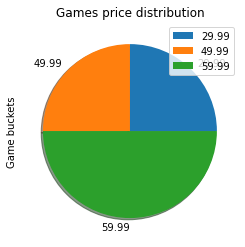

In [ ]:
import matplotlib.pyplot as plt
ax = df_result_Q15[['count','average_price']].groupby(['average_price']).sum().plot(kind='pie', y='count', shadow = True, title='Games price distribution')
ax.set_ylabel("Game buckets")

### Additional resources for MongoDB basic queries: 

[More MongoDB functions](https://www.unityjdbc.com/mongojdbc/mongosqltranslate.php) <br>
[Automated SQL to MongoDB query convertor (only works for basic queries!)](https://www.site24x7.com/tools/sql-to-mongodb.html) <br>
[SQL to MongoDB Official Mapping Chart](https://docs.mongodb.com/manual/reference/sql-comparison/) <br>

## 4/ MongoDB Advanced Queries - Joins

####  Query 15: How much did each order cost?
`SELECT o.order_number, SUM(o.quantity*g.price) as order_price`

`FROM orders o LEFT JOIN games g on g.game_id = o.game_id`

`GROUP BY order_number`

`ORDER BY order_number ASC`

--- 

In [ ]:
df_orders

,order_number,date,customer_id,game_id,quantity
0,1234,07/08/2016,10497,11,1
1,1234,07/08/2016,10497,12,1
2,9876,07/12/2016,23922,14,2
3,5467,07/20/2016,33927,13,1


### Method n°1: embedded documents for one-to-few relationships

In [ ]:
### Create a unique order dataframe with the games and customers information embedded (nested dictionnaries)

df_orders_embedded = pd.DataFrame(data = {'order_number': [1234, 1234, 9876, 5467],
                                          'date' : ['07/08/2016', '07/08/2016', '07/12/2016', '07/20/2016'],
                                          'customer' : [
                                                        {'customer_id': 10497,'first_name': 'Nic','last_name': 'Raboy','email': 'nic@test.com','phone': '510-229-0612'},
                                                        {'customer_id': 10497,'first_name': 'Nic','last_name': 'Raboy','email': 'nic@test.com','phone': '510-229-0612'},
                                                        {'customer_id': 23922,'first_name': 'Matt','last_name': 'Groves','email': 'matt@test.com'},
                                                        {'customer_id': 33927,'first_name': 'Arun','last_name': 'Gupta','email': 'arun@test.com','phone': '510-149-9782'}
                                          ],
                                          'game' : [
                                                    {'game_id': 11,'game_name': 'Pokemon Red','price': 29.99},
                                                    {'game_id': 12,'game_name': 'Dake Soul Red III','price': 59.99},
                                                    {'game_id': 14,'game_name': 'Super Smash Bros','price': 49.99},
                                                    {'game_id': 13,'game_name': 'RayMan 4','price': 59.99}
                                          ],
                                          'quantity' : [1, 1, 2, 1],
                                })

df_orders_embedded.head()

,order_number,date,customer,game,quantity
0,1234,07/08/2016,"{'customer_id': 10497, 'first_name': 'Nic', 'l...","{'game_id': 11, 'game_name': 'Pokemon Red', 'p...",1
1,1234,07/08/2016,"{'customer_id': 10497, 'first_name': 'Nic', 'l...","{'game_id': 12, 'game_name': 'Dake Soul Red II...",1
2,9876,07/12/2016,"{'customer_id': 23922, 'first_name': 'Matt', '...","{'game_id': 14, 'game_name': 'Super Smash Bros...",2
3,5467,07/20/2016,"{'customer_id': 33927, 'first_name': 'Arun', '...","{'game_id': 13, 'game_name': 'RayMan 4', 'pric...",1


In [ ]:
embedded_orders_dict = df_orders_embedded.to_dict('records')
embedded_orders = db["embedded_orders"]
embedded_orders.insert_many(embedded_orders_dict)
embedded_orders.find_one() 

{'_id': ObjectId('6262ea3e6616b3516925397b'),
 'order_number': 1234,
 'date': '07/08/2016',
 'customer': {'customer_id': 10497,
  'first_name': 'Nic',
  'last_name': 'Raboy',
  'email': 'nic@test.com',
  'phone': '510-229-0612'},
 'game': {'game_id': 11, 'game_name': 'Pokemon Red', 'price': 29.99},
 'quantity': 1}

In [ ]:
print(db.list_collection_names()) 

['games', 'embedded_orders', 'customers', 'orders']


In [ ]:
query_15_M1 =  db.embedded_orders.aggregate(
    [{'$group':
      {'_id': "$order_number",
       'total_price':{'$sum': { '$multiply': [ "$game.price", "$quantity" ]}}}
     },
     {'$sort':{"_id":1}}                                     
    ])

M1_results = MongoDB_to_DataFrame(query_15_M1)
M1_results

,_id,total_price
0,1234,89.98
1,5467,59.99
2,9876,99.98


### Method n°2: $lookup function for one-to-many relationships

In [ ]:
query_15_M21 = db.orders.aggregate([
   {
     '$lookup':
       {
         'from': "games",             # table you want to join to the parent table
         'localField': "game_id",     # join attribute from the parent table
         'foreignField': "game_id",   # join attribute from the joined table (the table in the "from" field above)
         'as': "game_info"            # name you want to give to the embedded dictionary output by the $lookup method
       }
  } 
])
MongoDB_to_DataFrame(query_15_M21)

,_id,order_number,date,customer_id,game_id,quantity,game_info
0,6262e8316616b35169253977,1234,07/08/2016,10497,11,1,"[{'_id': 6262e82e6616b35169253973, 'game_id': ..."
1,6262e8316616b35169253978,1234,07/08/2016,10497,12,1,"[{'_id': 6262e82e6616b35169253974, 'game_id': ..."
2,6262e8316616b35169253979,9876,07/12/2016,23922,14,2,"[{'_id': 6262e82e6616b35169253976, 'game_id': ..."
3,6262e8316616b3516925397a,5467,07/20/2016,33927,13,1,"[{'_id': 6262e82e6616b35169253975, 'game_id': ..."


In [ ]:
query_15_M22 =  db.orders.aggregate([
   {
     '$lookup':
       {
         'from': "games",             
         'localField': "game_id",     
         'foreignField': "game_id",   
         'as': "game_info"            
       }
  },
    {'$unwind': { 'path': "$game_info", 'preserveNullAndEmptyArrays': True}}    # enable the embedded dictionary attributes to be accessed in the query 
])
MongoDB_to_DataFrame(query_15_M22)

,_id,order_number,date,customer_id,game_id,quantity,game_info
0,6262e8316616b35169253977,1234,07/08/2016,10497,11,1,"{'_id': 6262e82e6616b35169253973, 'game_id': 1..."
1,6262e8316616b35169253978,1234,07/08/2016,10497,12,1,"{'_id': 6262e82e6616b35169253974, 'game_id': 1..."
2,6262e8316616b35169253979,9876,07/12/2016,23922,14,2,"{'_id': 6262e82e6616b35169253976, 'game_id': 1..."
3,6262e8316616b3516925397a,5467,07/20/2016,33927,13,1,"{'_id': 6262e82e6616b35169253975, 'game_id': 1..."


In [ ]:
query_15_M23 =  db.orders.aggregate([
   {
     '$lookup':
       {
         'from': "games",
         'localField': "game_id",
         'foreignField': "game_id",
         'as': "game_info"
       }
  },
    {'$unwind': { 'path': "$game_info", 'preserveNullAndEmptyArrays': True}},
    {'$group':
      {
       '_id': "$order_number",
       'total_price':{'$sum': { '$multiply': [ "$game_info.price", "$quantity" ]}}  # use $joined_table_name.attribute_name to call an attribute from a joined table
      }
    },
    {'$sort':{"_id":1}}
])
M2_results = MongoDB_to_DataFrame(query_15_M23)
M2_results

,_id,total_price
0,1234,89.98
1,5467,59.99
2,9876,99.98


In [ ]:
## Sanity check : do method n°1 and method n°2 give the same result? 
M2_results.equals(M1_results) 

True

###  To embed or not to embed, that is the question...

![Capture%20d%E2%80%99e%CC%81cran%202021-04-23%20a%CC%80%2012.19.30.png](attachment:Capture%20d%E2%80%99e%CC%81cran%202021-04-23%20a%CC%80%2012.19.30.png)

In [ ]:
df_customers

,customer_id,first_name,last_name,email,phone
0,10497,Nic,Raboy,nic@test.com,510-229-0612
1,23922,Matt,Groves,matt@test.com,NaN
2,33927,Arun,Gupta,arun@test.com,510-149-9782
3,43736,Hod,Greeley,hod@test.com,510-718-3340


In [ ]:
df_orders

,order_number,date,customer_id,game_id,quantity
0,1234,07/08/2016,10497,11,1
1,1234,07/08/2016,10497,12,1
2,9876,07/12/2016,23922,14,2
3,5467,07/20/2016,33927,13,1


#### Example 16: `Who placed an order with more than 1 quantity?` 

Retrieve their email and phone numbers as their identifier, as well as the order number and order date. 

In [ ]:
query_16 =  db.orders.aggregate([
   {
     '$lookup':
       {
         'from': "customers" ,
         'localField': "customer_id" ,
         'foreignField': "customer_id" ,
         'as': "customer_info"
       }
   },
    
    {'$unwind': { 'path': "$customer_info" , 'preserveNullAndEmptyArrays': True}},
    
    {'$project': {"_id": 0,
                  "quantity": "$quantity",
                  "email": "$customer_info.email",
                  "phone": "$customer_info.phone"}},
    
    {"$match" : {"quantity" : {"$gt" : 1}}}
    ]) 

MongoDB_to_DataFrame(query_16) 

,quantity,email
0,2,matt@test.com


####  Example 17: `Who placed an order with date after 10th July 2016?` 

Retrieve their email and phone numbers as their identifier, as well as the order number and order date. 

In [ ]:
query_17 =  db.orders.aggregate([
   {
     '$lookup':
       {
         'from': "customers" ,
         'localField': "customer_id" ,
         'foreignField': "customer_id" ,
         'as': "customer_info"
       }
   },
    
    {'$unwind': { 'path': "$customer_info" , 'preserveNullAndEmptyArrays': True}},
    
    {'$project': {"_id": 0,
                  "date": "$date",
                  "email": "$customer_info.email",
                  "phone": "$customer_info.phone"}},
    
    {"$match" : {"date" : {"$gte" : '07/10/2016'}}}
    ]) 

MongoDB_to_DataFrame(query_17) 

,date,email,phone
0,07/12/2016,matt@test.com,NaN
1,07/20/2016,arun@test.com,510-149-9782


###  Exercice 4: Who placed an order containing the "RayMan 4" game?

`SELECT g.game_name as game, CONCAT(c.first_name, " ", c.last_name)  as customer_full_name,` 

`FROM orders o LEFT JOIN games g on g.game_id = o.game_id LEFT JOIN customers c on c.customer_id = o.customer_id`

`WHERE g.game_name = "RayMan 4"` 

--- 

In [ ]:
ex_4 =  db.orders.aggregate([
   {
     '$lookup':
       {
         'from': "customers",
         'localField': "customer_id",
         'foreignField': "customer_id",
         'as': "customer_info"
       }
   },
    {
     '$lookup':
       {
         'from': "games",
         'localField': "game_id",
         'foreignField': "game_id",
         'as': "game_info"
       }
   },
    
    {'$unwind': { 'path': "$customer_info", 'preserveNullAndEmptyArrays': True}},
    {'$unwind': { 'path': "$game_info", 'preserveNullAndEmptyArrays': True}},
    
    ## Use $project operator : it passes along the documents with the requested fields 
    ## to the next stage in the pipeline. The specified fields can be existing fields 
    ## from the input documents or newly computed fields --> similar to pi projector! 
    
    {'$project': {"_id": 0,
                  "game" : "$game_info.game_name",
                  'customer_full_name': {'$concat': ["$customer_info.first_name", " ", "$customer_info.last_name"]},
                  }},
    
    ## Use $match operator to filter the rows (similar to select (sigma) operator in RA!)
    {"$match" : {"game" : {"$eq" : 'RayMan 4'}}}
    
    ]) 

MongoDB_to_DataFrame(ex4) 

,game,customer_full_name,total_price
0,RayMan 4,Arun Gupta,59.99


## Appendix - Discussion on primary keys

- MongoDB is a NoSQL database : there is no concept of tables or no direct support of foreign keys, primary keys or identifying relationships. 


- Mongodb is not build on ACID properties but CAP theorem: it encourages to put relevant data into a single collection rather than putting into multiple collections and then map those multiple collections using foreign keys. 


- Remember that each document doesn't have any field (NoSQL equivalent of a SQL attribute/column) strictly required. To uniquely identify each document and be able to access it efficiently in the distributed databases, MongoDB generates a unique id for each document in the collection (the Object ID hashed key). This unique identifier can be modified by the DB designer to be a certain attribute from the collection: this attribute will act like a primary key. 

In [ ]:
df_games_V2 = pd.DataFrame(data = {'_id': [11, 12, 13, 14],  #call your primary key _id
                                   'game_name': ['Pokemon Red', 'Dake Soul Red III', 'RayMan 4', 'Super Smash Bros'],
                                   'price' : [29.99, 59.99, 59.99, 49.99]
                                  })
df_games_V2.head()

,_id,game_name,price
0,11,Pokemon Red,29.99
1,12,Dake Soul Red III,59.99
2,13,RayMan 4,59.99
3,14,Super Smash Bros,49.99


In [ ]:
df_games

,game_id,game_name,price
0,11,Pokemon Red,29.99
1,12,Dake Soul Red III,59.99
2,13,RayMan 4,59.99
3,14,Super Smash Bros,49.99


In [ ]:
games_dict_V2 = df_games_V2.to_dict('records')
games_V2 = db["games_V2"]
games_V2.insert_many(games_dict_V2) 
db.games_V2.find_one()

{'_id': 11, 'game_name': 'Pokemon Red', 'price': 29.99}

In [ ]:
db.games.find_one()

{'_id': ObjectId('6262e82e6616b35169253973'),
 'game_id': 11,
 'game_name': 'Pokemon Red',
 'price': 29.99}

In [ ]:
query_V2 = db.games_V2.find({},
                            {'game_name': 1, 'price': 1}
                           ) 
MongoDB_to_DataFrame(query_V2)

,_id,game_name,price
0,11,Pokemon Red,29.99
1,12,Dake Soul Red III,59.99
2,13,RayMan 4,59.99
3,14,Super Smash Bros,49.99


In [ ]:
query_V1 = db.games.find({},
                            {'game_name': 1, 'price': 1}
                           ) 
MongoDB_to_DataFrame(query_V1)

,_id,game_name,price
0,6262e82e6616b35169253973,Pokemon Red,29.99
1,6262e82e6616b35169253974,Dake Soul Red III,59.99
2,6262e82e6616b35169253975,RayMan 4,59.99
3,6262e82e6616b35169253976,Super Smash Bros,49.99


In [ ]:
#db.games_V2.drop()

### Additional resources: 

[MongoDB documentation on MDB database design rules](https://www.mongodb.com/blog/post/6-rules-of-thumb-for-mongodb-schema-design-part-1) <br>
[What is MongoDB _Object id_ and how to use it](https://orangematter.solarwinds.com/2019/12/22/what-is-mongodbs-id-field-and-how-to-use-it/) <br>